# Amazon Alexa Review - Sentiment Analysis

Analyzing the Amazon Alexa dataset and building classification models to predict if the sentiment of a given input sentence is positive or negative.

### Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
import pickle
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
%pip install wordcloud



```
# This is formatted as code
```

### Exploratory Data Analysis

In [ ]:
#Load the data

data = pd.read_csv(r"/content/amazon_alexa.tsv", delimiter = '\t', quoting = 3)

print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


from matplotlib import pyplot as plt
_df_0['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('variation').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('verified_reviews').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('variation')):
  _plot_series(series, series_name, i)
  fig.legend(title='variation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['rating']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('verified_reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='verified_reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('rating')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('variation')):
  _plot_series(series, series_name, i)
  fig.legend(title='variation', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('verified_reviews')):
  _plot_series(series, series_name, i)
  fig.legend(title='verified_reviews', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['rating'].plot(kind='line', figsize=(8, 4), title='rating')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['verified_reviews'].value_counts()
    for x_label, grp in _df_8.groupby('variation')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('variation')
_ = plt.ylabel('verified_reviews')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['variation'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='rating', y='variation', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['verified_reviews'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='rating', y='verified_reviews', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
#Column names

print(f"Feature names : {data.columns.values}")

Feature names : ['rating' 'date' 'variation' 'verified_reviews' 'feedback']


In [ ]:
#Check for null values

data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

There is one record with no 'verified_reviews' (null value)

In [ ]:
#Getting the record where 'verified_reviews' is null

data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [ ]:
#We will drop the null record

data.dropna(inplace=True)

In [ ]:
print(f"Dataset shape after dropping null values : {data.shape}")

Dataset shape after dropping null values : (3149, 5)


In [ ]:
#Creating a new column 'length' that will contain the length of the string in 'verified_reviews' column

data['length'] = data['verified_reviews'].apply(len)

In [ ]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


The 'length' column is new generated column - stores the length of 'verified_reviews' for that record. Let's check for some sample records

In [ ]:
#Randomly checking for 10th record

print(f"'verified_reviews' column value: {data.iloc[10]['verified_reviews']}") #Original value
print(f"Length of review : {len(data.iloc[10]['verified_reviews'])}") #Length of review using len()
print(f"'length' column value : {data.iloc[10]['length']}") #Value of the column 'length'

'verified_reviews' column value: "I sent it to my 85 year old Dad, and he talks to it constantly."
Length of review : 65
'length' column value : 65


We can see that the length of review is the same as the value in the length column for that record

Datatypes of the features

In [ ]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

* rating, feedback and length are integer values <br>
* date, variation and verified_reviews are string values

### Analyzing 'rating' column

This column refers to the rating of the variation given by the user

In [ ]:
len(data)

3149

In [ ]:
#Distinct values of 'rating' and its count

print(f"Rating value count: \n{data['rating'].value_counts()}")

Rating value count: 
rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64


Let's plot the above values in a bar graph

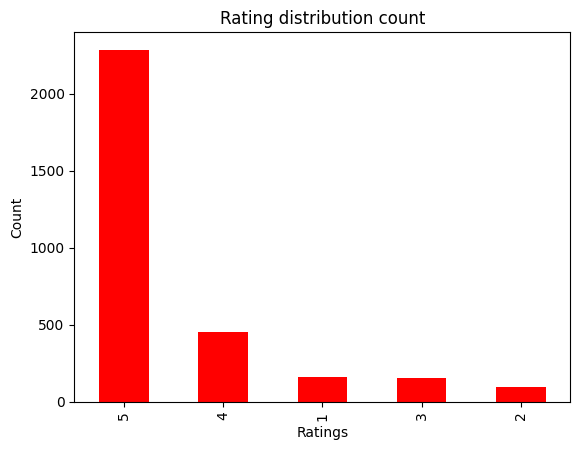

In [ ]:
#Bar plot to visualize the total counts of each rating

data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each rating - we'll divide the number of records for each rating by total number of records

print(f"Rating value count - percentage distribution: \n{round(data['rating'].value_counts()/data.shape[0]*100,2)}")

Rating value count - percentage distribution: 
rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64


Let's plot the above values in a pie chart

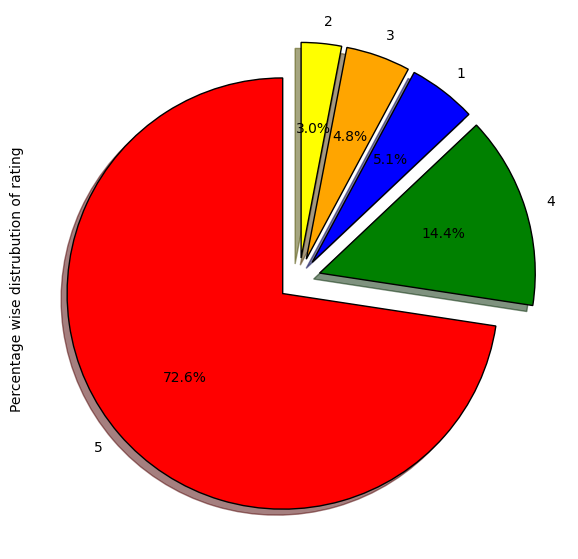

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green', 'blue','orange','yellow')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['rating'].value_counts()/data.shape[0]

explode=(0.1,0.1,0.1,0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

from io import  BytesIO

graph = BytesIO()

fig.savefig(graph, format="png")

### Analyzing 'feedback' column

This column refers to the feedback of the verified review

In [ ]:
#Distinct values of 'feedback' and its count

print(f"Feedback value count: \n{data['feedback'].value_counts()}")

Feedback value count: 
feedback
1    2893
0     256
Name: count, dtype: int64


There are 2 distinct values of 'feedback' present - 0 and 1. Let's see what kind of review each value corresponds to.

feedback value = 0

In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 0

review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


In [ ]:
#Extracting the 'verified_reviews' value for one record with feedback = 1

review_1 = data[data['feedback'] == 1].iloc[1]['verified_reviews']
print(review_1)

Loved it!


From the above 2 examples we can see that feedback **0 is negative review** and **1 is positive review**

Let's plot the feedback value count in a bar graph

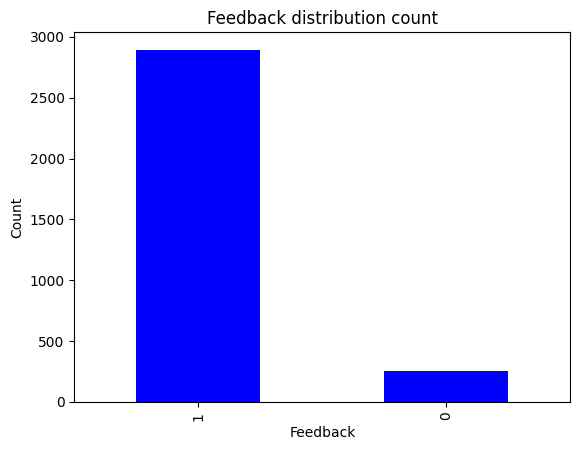

In [ ]:
#Bar graph to visualize the total counts of each feedback

data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each feedback - we'll divide the number of records for each feedback by total number of records

print(f"Feedback value count - percentage distribution: \n{round(data['feedback'].value_counts()/data.shape[0]*100,2)}")

Feedback value count - percentage distribution: 
feedback
1    91.87
0     8.13
Name: count, dtype: float64


Feedback distribution <br>
* 91.87% reviews are positive <br>
* 8.13% reviews are negative

<Axes: ylabel='Percentage wise distrubution of feedback'>

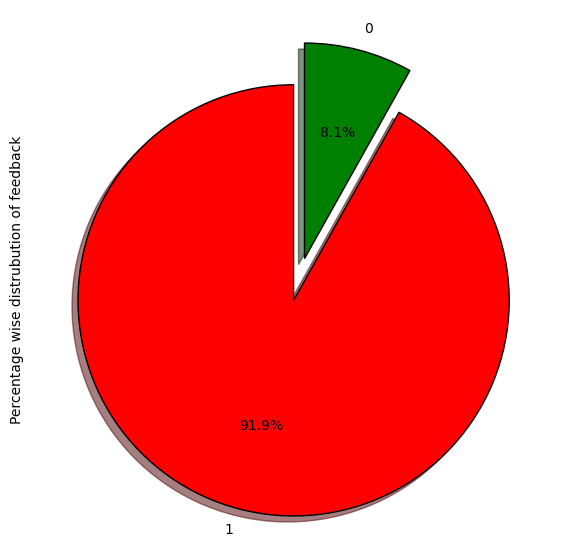

In [ ]:
fig = plt.figure(figsize=(7,7))

colors = ('red', 'green')

wp = {'linewidth':1, "edgecolor":'black'}

tags = data['feedback'].value_counts()/data.shape[0]

explode=(0.1,0.1)

tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, startangle=90, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

Let's see the 'rating' values for different values of 'feedback'

In [ ]:
#Feedback = 0
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [ ]:
#Feedback = 1
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

##### If rating of a review is 1 or 2 then the feedback is 0 (negative) and if the rating is 3, 4 or 5 then the feedback is 1 (positive).

### Analyzing 'variation' column

This column refers to the variation or type of Amazon Alexa product. Example - Black Dot, Charcoal Fabric etc.

In [ ]:
#Distinct values of 'variation' and its count

print(f"Variation value count: \n{data['variation'].value_counts()}")

Variation value count: 
variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64


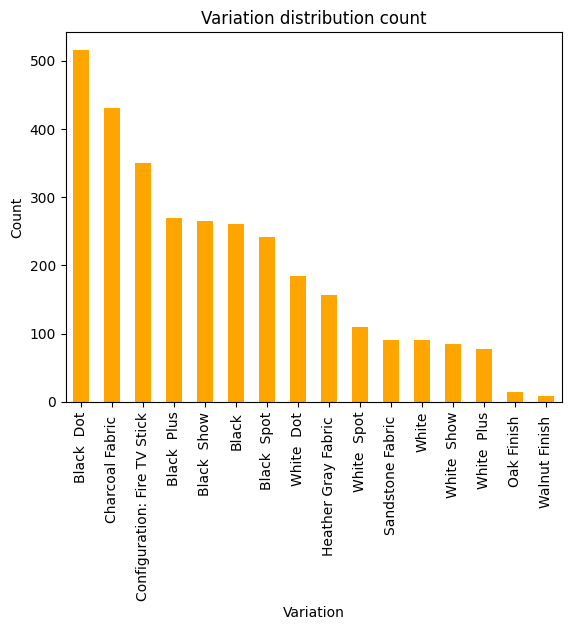

In [ ]:
#Bar graph to visualize the total counts of each variation

data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [ ]:
#Finding the percentage distribution of each variation - we'll divide the number of records for each variation by total number of records

print(f"Variation value count - percentage distribution: \n{round(data['variation'].value_counts()/data.shape[0]*100,2)}")

Variation value count - percentage distribution: 
variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64


Mean rating according to variation

In [ ]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

Let's analyze the above ratings

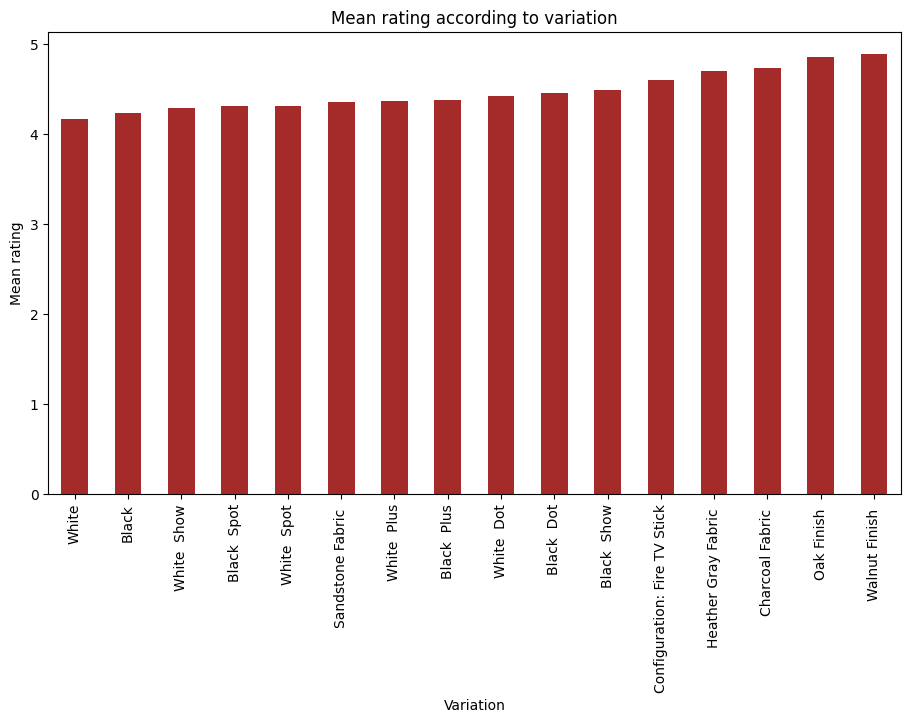

In [ ]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

### Analyzing 'verified_reviews' column

This column contains the textual review given by the user for a variation for the product.

In [ ]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

Length analysis for full dataset

[Text(0.5, 1.0, 'Distribution of length of review ')]

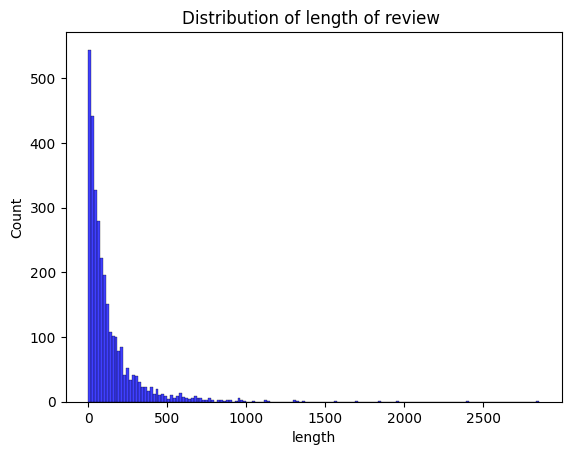

In [ ]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

Length analysis when feedback is 0 (negative)

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

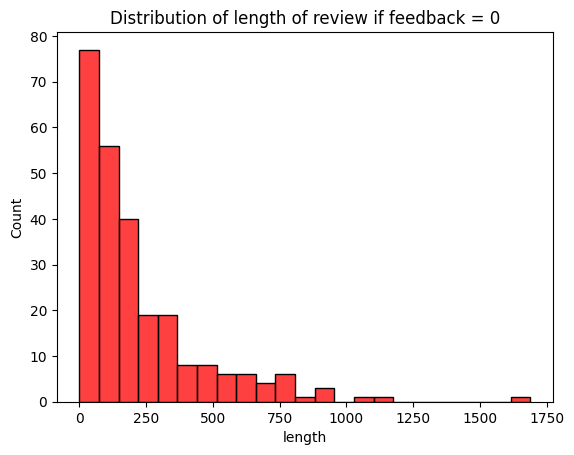

In [ ]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

Length analysis when feedback is 1 (positive)

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

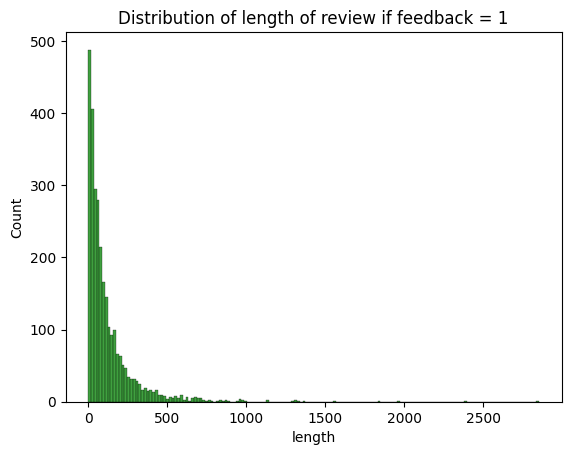

In [ ]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

Lengthwise mean rating

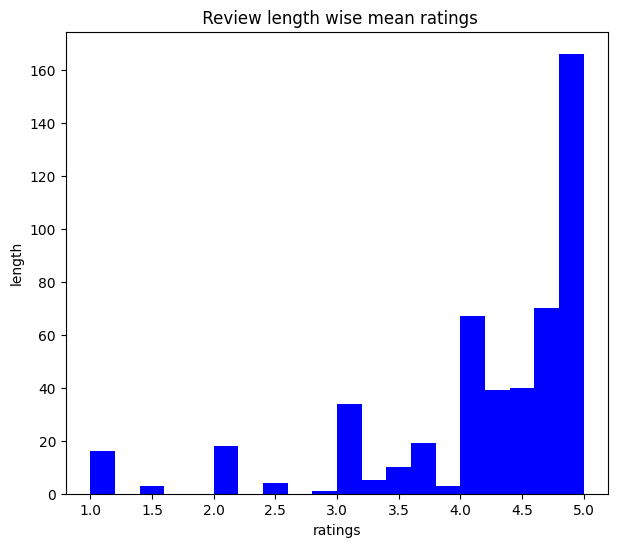

In [ ]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [ ]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)

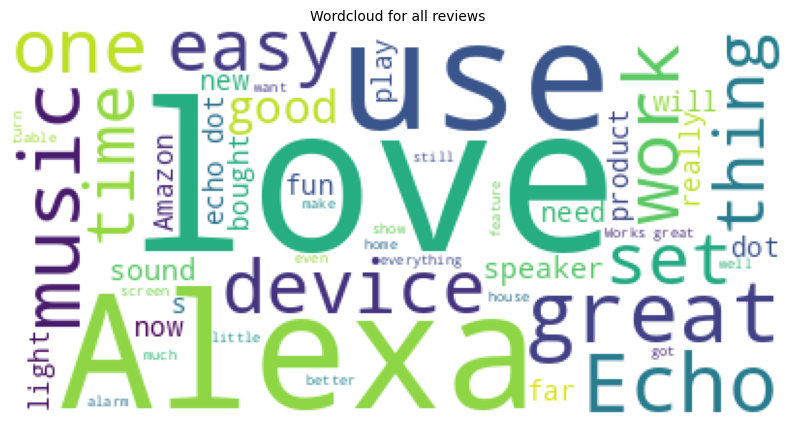

In [ ]:
# Combine all reviews
reviews = " ".join([review for review in data['verified_reviews']])

# Initialize wordcloud object
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

Lets find the unique words in each feedback category

In [ ]:
# Combine all reviews for each feedback category and splitting them into individual words
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()

#Finding words from reviews which are present in that feedback category only
unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)


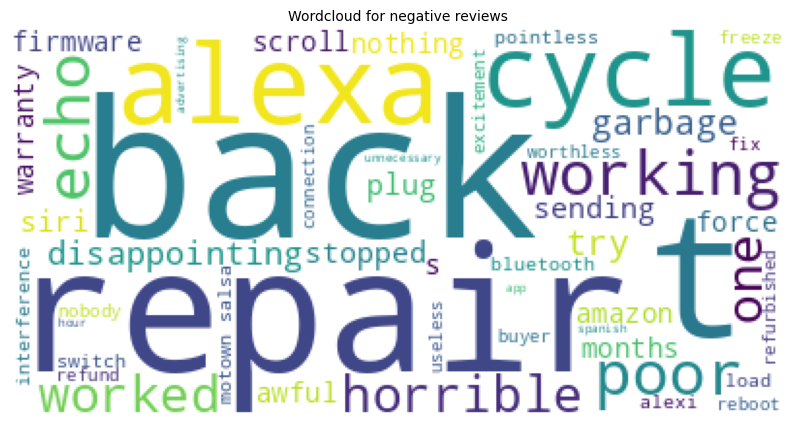

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

Negative words can be seen in the above word cloud - garbage, pointless, poor, horrible, repair etc

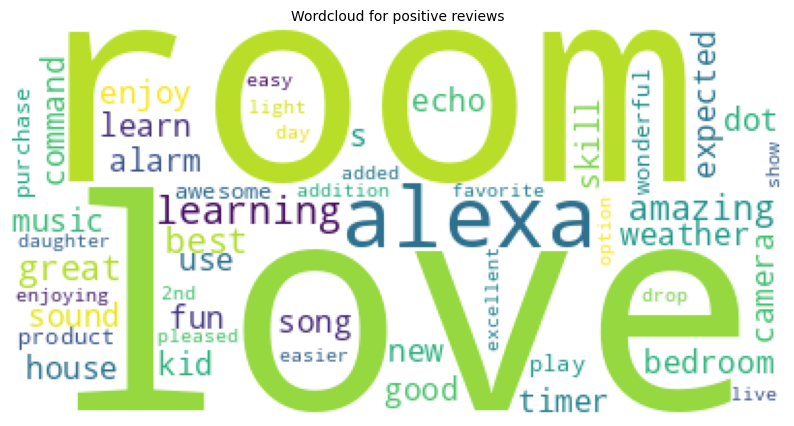

In [ ]:
wc = WordCloud(background_color='white', max_words=50)

# Generate and plot wordcloud
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

Positive words can be seen in the above word cloud - good, enjoying, amazing, best, great etc

# Preprocessing and Modelling

To build the corpus from the 'verified_reviews' we perform the following - <br>
1. Replace any non alphabet characters with a space
2. Covert to lower case and split into words
3. Iterate over the individual words and if it is not a stopword then add the stemmed form of the word to the corpus

In [ ]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

Using Count Vectorizer to create bag of words

In [ ]:
cv = CountVectorizer(max_features = 2500)

#Storing independent and dependent variables in X and y
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [ ]:
import os
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Create the directory if it doesn't exist
if not os.path.exists('Models'):
    os.makedirs('Models')

# Assuming 'cv' is your CountVectorizer object

# Save the CountVectorizer model
with open('Models/countVectorizer.pkl', 'wb') as file:
    pickle.dump(cv, file)




Checking the shape of X and y

In [ ]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (3149, 2500)
y shape: (3149,)


Splitting data into train and test set with 30% data with testing.

> Add blockquote



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (2204, 2500)
y train: (2204,)
X test: (945, 2500)
y test: (945,)


In [ ]:
print(f"X train max value: {X_train.max()}")
print(f"X test max value: {X_test.max()}")

X train max value: 12
X test max value: 10


We'll scale X_train and X_test so that all values are between 0 and 1.

In [ ]:
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
import os
import pickle
from sklearn.feature_extraction.text import CountVectorizer

# Create the directory if it doesn't exist
if not os.path.exists('Models'):
    os.makedirs('Models')

# Assuming 'cv' is your CountVectorizer object

# Save the CountVectorizer model
with open('Models/scaler.pkl', 'wb') as file:
    pickle.dump(cv, file)


#### Random Forest

In [ ]:
#Fitting scaled X_train and y_train on Random Forest Classifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
#Accuracy of the model on training and testing data
Training_Accuracy = model_rf.score(X_train_scl, y_train)
Testing_Accuracy = model_rf.score(X_test_scl, y_test)
print("Training Accuracy :",Training_Accuracy)
print("Testing Accuracy :", Testing_Accuracy)
RFC=model_rf.score(X_test_scl, y_test)

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9396825396825397


In [ ]:
#Predicting on the test set
y_preds = model_rf.predict(X_test_scl)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)

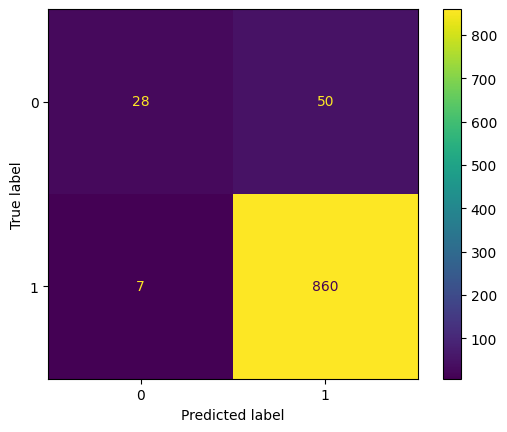

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.36      0.50        78
           1       0.95      0.99      0.97       867

    accuracy                           0.94       945
   macro avg       0.87      0.68      0.73       945
weighted avg       0.93      0.94      0.93       945



In [ ]:
from sklearn.metrics import log_loss

# Probability estimates of the test set
y_probs = model_rf.predict_proba(X_test_scl)

# Calculate log loss
logloss = log_loss(y_test, y_probs)
print("Log Loss:", logloss)


Log Loss: 0.1672189747824742


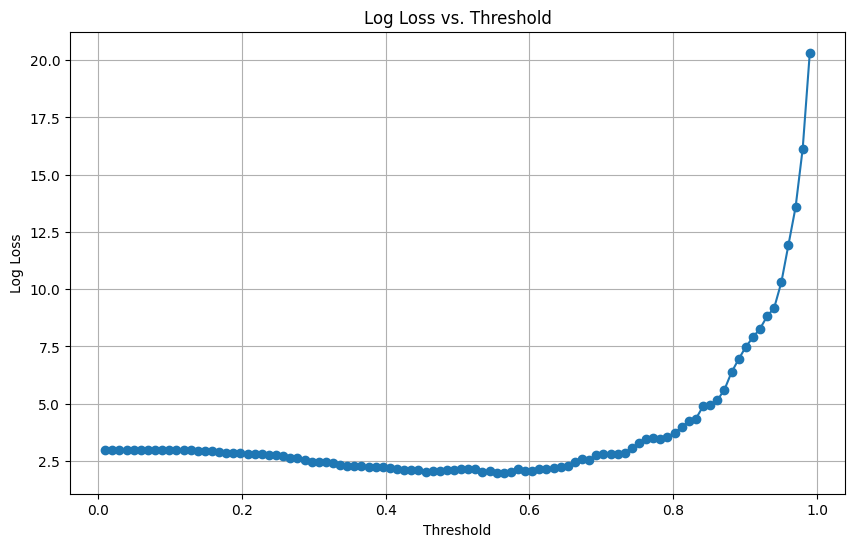

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Thresholds
thresholds = np.linspace(0.01, 0.99, 100)

# List to store log loss values
log_losses = []

# Calculate log loss for each threshold
for threshold in thresholds:
    y_thresholded = (y_probs[:,1] > threshold).astype(int)
    log_losses.append(log_loss(y_test, y_thresholded))

# Plot log loss vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, log_losses, marker='o', linestyle='-')
plt.title('Log Loss vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()


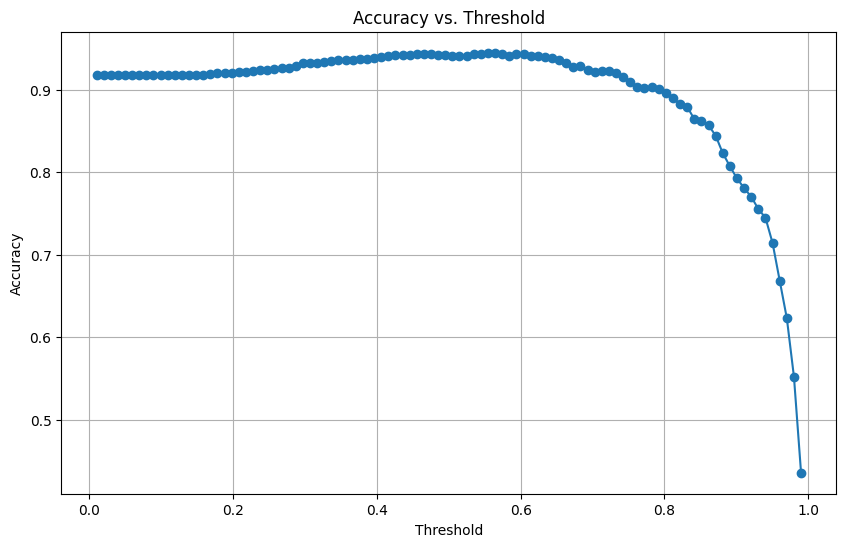

In [ ]:
# List to store accuracy values
accuracies = []

# Calculate accuracy for each threshold
for threshold in thresholds:
    y_thresholded = (y_probs[:,1] > threshold).astype(int)
    accuracy = accuracy_score(y_test, y_thresholded)
    accuracies.append(accuracy)

# Plot accuracy vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, marker='o', linestyle='-')
plt.title('Accuracy vs. Threshold')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


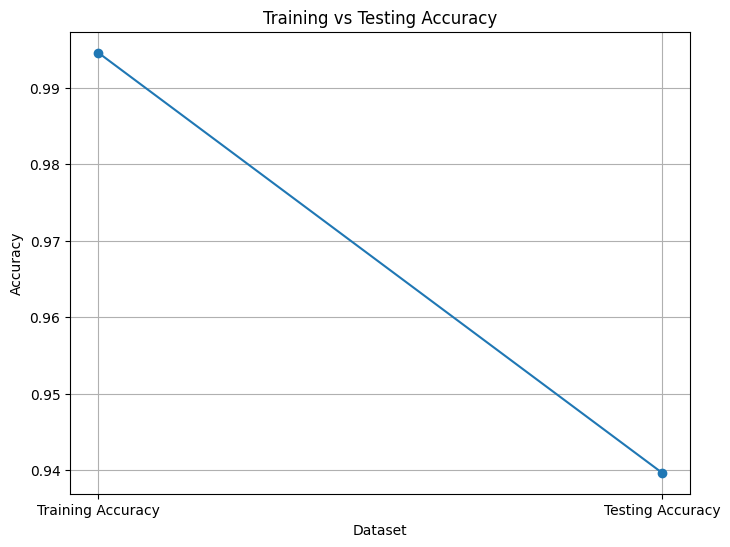

In [ ]:
import matplotlib.pyplot as plt

# Calculate training and testing accuracy
train_accuracy = model_rf.score(X_train_scl, y_train)
test_accuracy = model_rf.score(X_test_scl, y_test)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], marker='o', linestyle='-')
plt.title('Training vs Testing Accuracy')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
pickle.dump(model_rf, open('Models/model_rf.pkl', 'wb'))

K fold cross-validation

In [ ]:
accuracies = cross_val_score(estimator = model_rf, X = X_train_scl, y = y_train, cv = 10)

print("Accuracy :", accuracies.mean())
print("Standard Variance :", accuracies.std())

Accuracy : 0.9310324969148498
Standard Variance : 0.008582056426839284


Applying grid search to get the optimal parameters on random forest

In [ ]:
params = {
    'bootstrap': [True],
    'max_depth': [80, 100],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300]
}

In [ ]:
cv_object = StratifiedKFold(n_splits = 2)

grid_search = GridSearchCV(estimator = model_rf, param_grid = params, cv = cv_object, verbose = 0, return_train_score = True)
grid_search.fit(X_train_scl, y_train.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=2, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True], 'max_depth': [80, 100],
                         'min_samples_split': [8, 12],
                         'n_estimators': [100, 300]},
             return_train_score=True)

In [ ]:
#Getting the best parameters from the grid search


print("Best Parameter Combination : {}".format(grid_search.best_params_))

Best Parameter Combination : {'bootstrap': True, 'max_depth': 80, 'min_samples_split': 8, 'n_estimators': 300}


In [ ]:
print("Cross validation mean accuracy on train set : {}".format(grid_search.cv_results_['mean_train_score'].mean()*100))
print("Cross validation mean accuracy on test set : {}".format(grid_search.cv_results_['mean_test_score'].mean()*100))
print("Accuracy score for test set :", accuracy_score(y_test, y_preds))

Cross validation mean accuracy on train set : 96.6935117967332
Cross validation mean accuracy on test set : 92.16197822141561
Accuracy score for test set : 0.9396825396825397


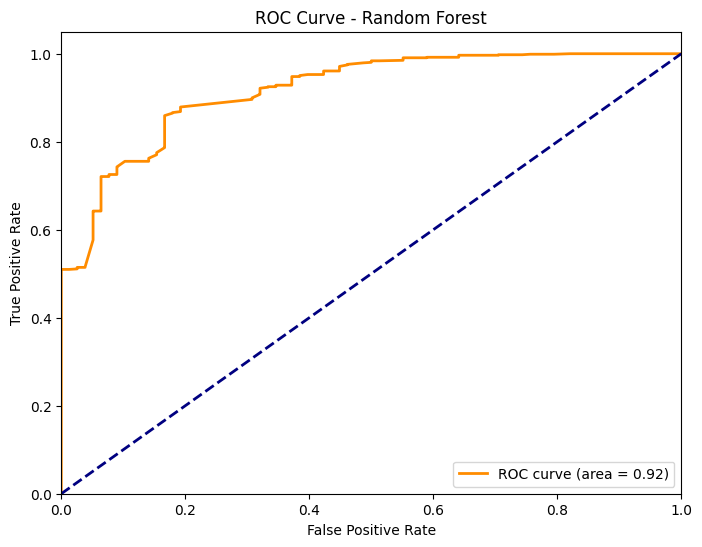

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (class 1)
y_probs_rf = model_rf.predict_proba(X_test_scl)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest')
plt.legend(loc="lower right")
plt.show()


#### XgBoost

In [ ]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train_scl, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
#Accuracy of the model on training and testing data
train_accuracy_xgb = model_xgb.score(X_train_scl, y_train)
testing_accuracy_xgb = model_xgb.score(X_test_scl, y_test)
print("Training Accuracy :", train_accuracy_xgb )
print("Testing Accuracy :", testing_accuracy_xgb)
XGB=model_xgb.score(X_test_scl, y_test)

Training Accuracy : 0.971415607985481
Testing Accuracy : 0.9417989417989417


In [ ]:
y_preds = model_xgb.predict(X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 31  47]
 [ 13 854]]


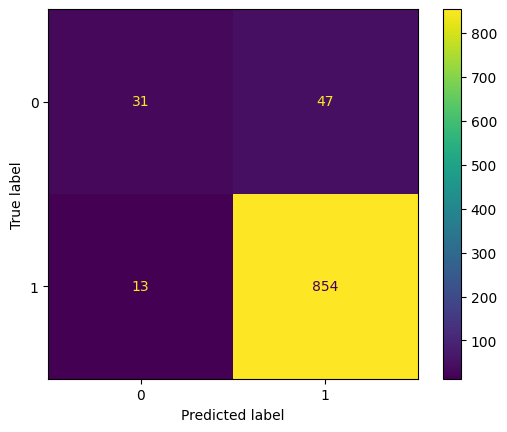

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.70      0.40      0.51        78
           1       0.95      0.99      0.97       867

    accuracy                           0.94       945
   macro avg       0.83      0.69      0.74       945
weighted avg       0.93      0.94      0.93       945



In [ ]:
from sklearn.metrics import log_loss

# Probability estimates of the test set
y_probs_xgb = model_xgb.predict_proba(X_test_scl)

# Calculate log loss
logloss_xgb = log_loss(y_test, y_probs_xgb)
print("Log Loss (XGBoost):", logloss_xgb)


Log Loss (XGBoost): 0.17606825028623746


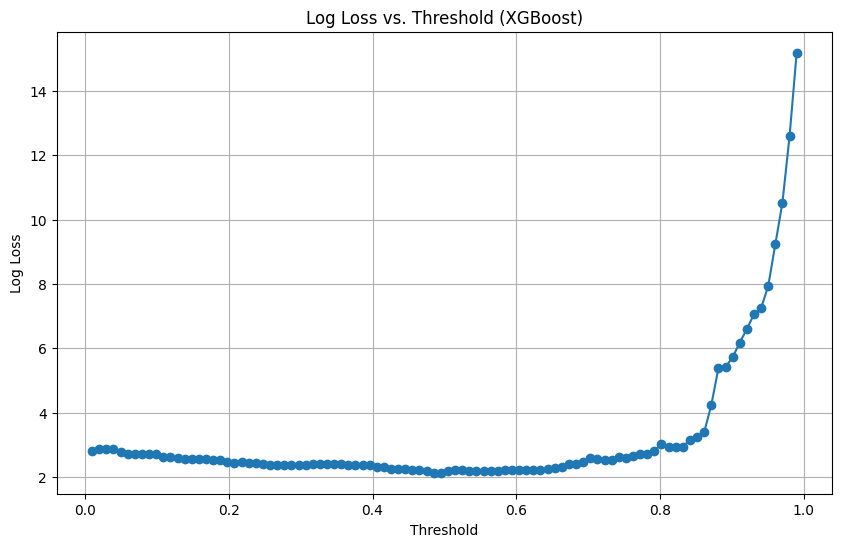

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Thresholds
thresholds = np.linspace(0.01, 0.99, 100)

# List to store log loss values
log_losses_xgb = []

# Calculate log loss for each threshold
for threshold in thresholds:
    y_thresholded_xgb = (y_probs_xgb[:,1] > threshold).astype(int)
    log_loss_xgb = log_loss(y_test, y_thresholded_xgb)
    log_losses_xgb.append(log_loss_xgb)

# Plot log loss vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, log_losses_xgb, marker='o', linestyle='-')
plt.title('Log Loss vs. Threshold (XGBoost)')
plt.xlabel('Threshold')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()


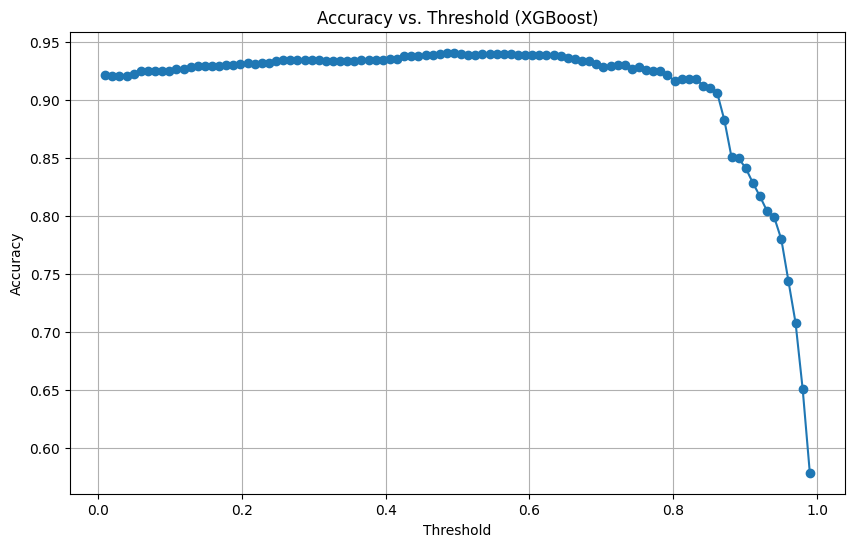

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# List to store accuracy values
accuracies_xgb = []

# Calculate accuracy for each threshold
for threshold in thresholds:
    y_thresholded_xgb = (y_probs_xgb[:,1] > threshold).astype(int)
    accuracy_xgb = accuracy_score(y_test, y_thresholded_xgb)
    accuracies_xgb.append(accuracy_xgb)

# Plot accuracy vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies_xgb, marker='o', linestyle='-')
plt.title('Accuracy vs. Threshold (XGBoost)')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


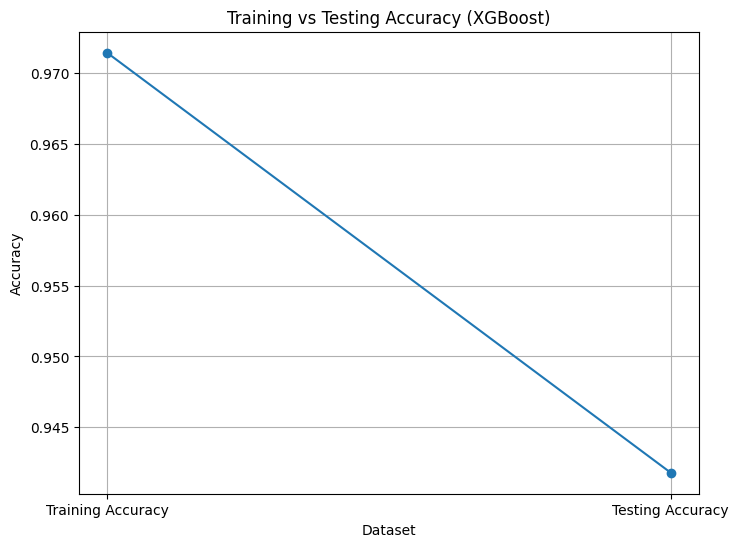

In [ ]:
import matplotlib.pyplot as plt

# Calculate training and testing accuracy for XGBoost
train_accuracy_xgb = model_xgb.score(X_train_scl, y_train)
test_accuracy_xgb = model_xgb.score(X_test_scl, y_test)

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(['Training Accuracy', 'Testing Accuracy'], [train_accuracy_xgb, testing_accuracy_xgb], marker='o', linestyle='-')
plt.title('Training vs Testing Accuracy (XGBoost)')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()


In [ ]:
#Saving the XGBoost classifier
pickle.dump(model_xgb, open('Models/model_xgb.pkl', 'wb'))

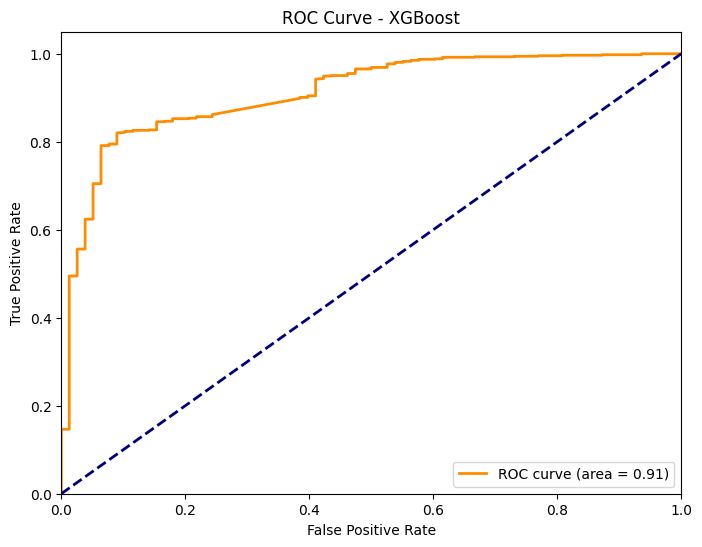

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (class 1)
y_probs_xgb = model_xgb.predict_proba(X_test_scl)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_xgb)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()


#### Decision Tree Classifier

In [ ]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train_scl, y_train)

DecisionTreeClassifier()

In [ ]:
#Accuracy of the model on training and testing data
train_accuracy_dt = model_dt.score(X_train_scl, y_train)
test_accuracy_dt = model_dt.score(X_test_scl, y_test)
print("Training Accuracy :", train_accuracy_dt)
print("Testing Accuracy :", test_accuracy_dt)
DTC=model_dt.score(X_test_scl, y_test)

Training Accuracy : 0.9945553539019963
Testing Accuracy : 0.9164021164021164


In [ ]:
y_preds = model_dt.predict(X_test)

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
print(cm)

[[ 40  38]
 [ 75 792]]


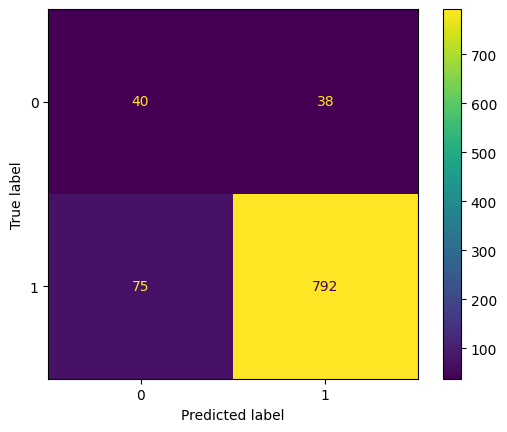

In [ ]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.35      0.51      0.41        78
           1       0.95      0.91      0.93       867

    accuracy                           0.88       945
   macro avg       0.65      0.71      0.67       945
weighted avg       0.90      0.88      0.89       945



In [ ]:
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelBinarizer

# Convert class predictions to probabilities
lb = LabelBinarizer()
y_probs_dt = lb.fit_transform(y_preds)

# Calculate log loss
logloss_dt = log_loss(y_test, y_probs_dt)
print("Log Loss (Decision Tree):", logloss_dt)


Log Loss (Decision Tree): 4.30998183383094


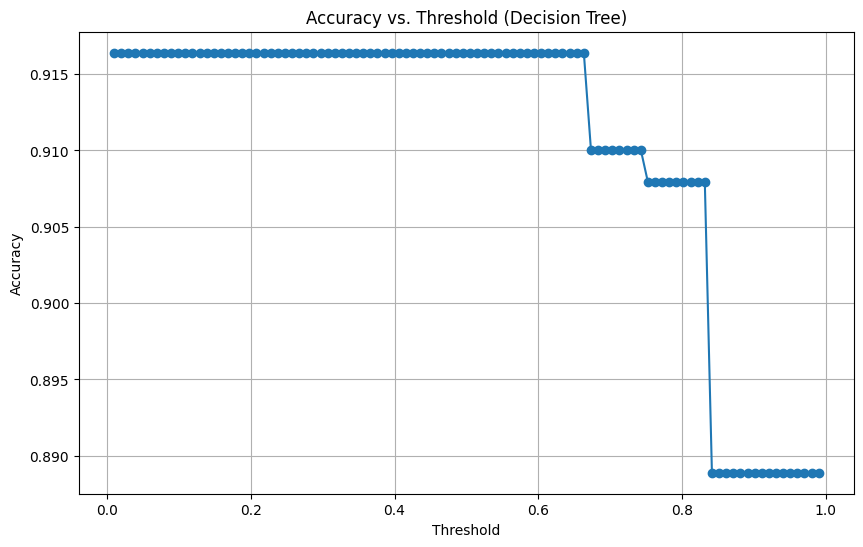

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Assuming you have already trained the Decision Tree classifier 'model_dt' and preprocessed your data

# Probability estimates for the positive class (class 1)
y_probs_positive = model_dt.predict_proba(X_test_scl)[:, 1]

# Thresholds
thresholds = np.linspace(0.01, 0.99, 100)

# List to store accuracy values
accuracies_dt = []

# Calculate accuracy for each threshold
for threshold in thresholds:
    # Convert the probability estimates to binary predictions using the threshold
    y_thresholded_dt = (y_probs_positive > threshold).astype(int)
    # Calculate accuracy
    accuracy_dt = accuracy_score(y_test, y_thresholded_dt)
    accuracies_dt.append(accuracy_dt)

# Plot accuracy vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies_dt, marker='o', linestyle='-')
plt.title('Accuracy vs. Threshold (Decision Tree)')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()



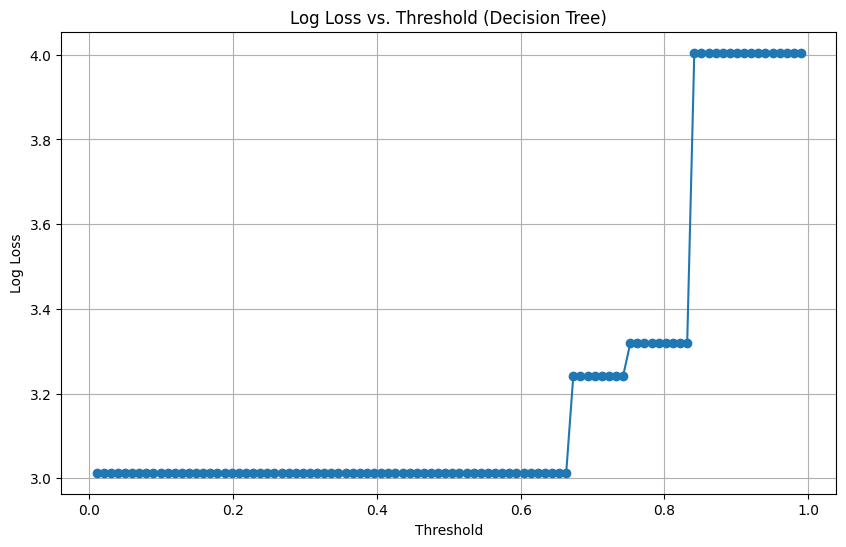

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss

# Probability estimates for the positive class (class 1)
y_probs_positive = model_dt.predict_proba(X_test_scl)[:, 1]

# Thresholds
thresholds = np.linspace(0.01, 0.99, 100)

# List to store log loss values
log_losses_dt = []

# Calculate log loss for each threshold
for threshold in thresholds:
    # Convert the probability estimates to binary predictions using the threshold
    y_thresholded_dt = (y_probs_positive > threshold).astype(int)
    # Compute the log loss
    log_loss_dt = log_loss(y_test, y_thresholded_dt)
    log_losses_dt.append(log_loss_dt)

# Plot log loss vs threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, log_losses_dt, marker='o', linestyle='-')
plt.title('Log Loss vs. Threshold (Decision Tree)')
plt.xlabel('Threshold')
plt.ylabel('Log Loss')
plt.grid(True)
plt.show()


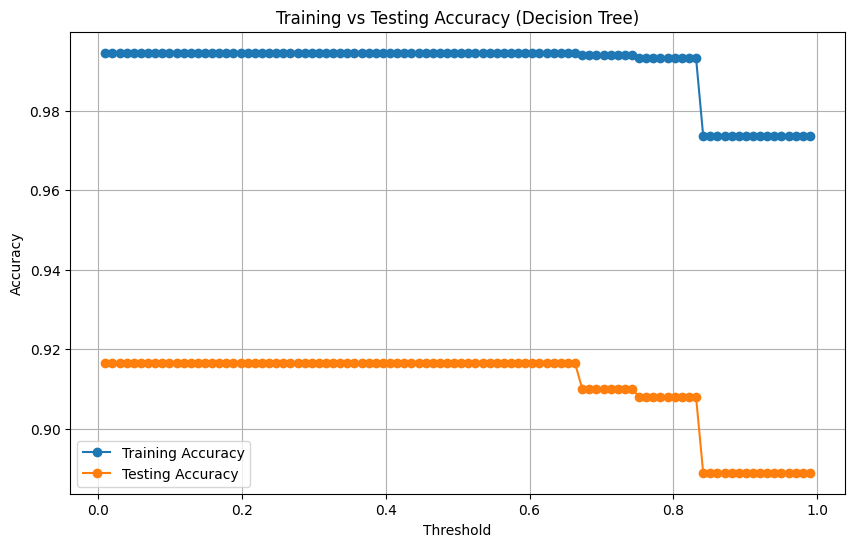

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Probability estimates for the positive class (class 1) for testing set
y_probs_positive_test = model_dt.predict_proba(X_test_scl)[:, 1]

# Probability estimates for the positive class (class 1) for training set
y_probs_positive_train = model_dt.predict_proba(X_train_scl)[:, 1]

# Thresholds
thresholds = np.linspace(0.01, 0.99, 100)

# List to store training and testing accuracies
train_accuracies_dt = []
test_accuracies_dt = []

# Calculate accuracy for each threshold
for threshold in thresholds:
    # Convert the probability estimates to binary predictions using the threshold for testing set
    y_thresholded_test = (y_probs_positive_test > threshold).astype(int)
    # Calculate accuracy for testing set
    test_accuracy_dt = accuracy_score(y_test, y_thresholded_test)
    test_accuracies_dt.append(test_accuracy_dt)

    # Convert the probability estimates to binary predictions using the threshold for training set
    y_thresholded_train = (y_probs_positive_train > threshold).astype(int)
    # Calculate accuracy for training set
    train_accuracy_dt = accuracy_score(y_train, y_thresholded_train)
    train_accuracies_dt.append(train_accuracy_dt)

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(thresholds, train_accuracies_dt, label='Training Accuracy', marker='o', linestyle='-')
plt.plot(thresholds, test_accuracies_dt, label='Testing Accuracy', marker='o', linestyle='-')
plt.title('Training vs Testing Accuracy (Decision Tree)')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


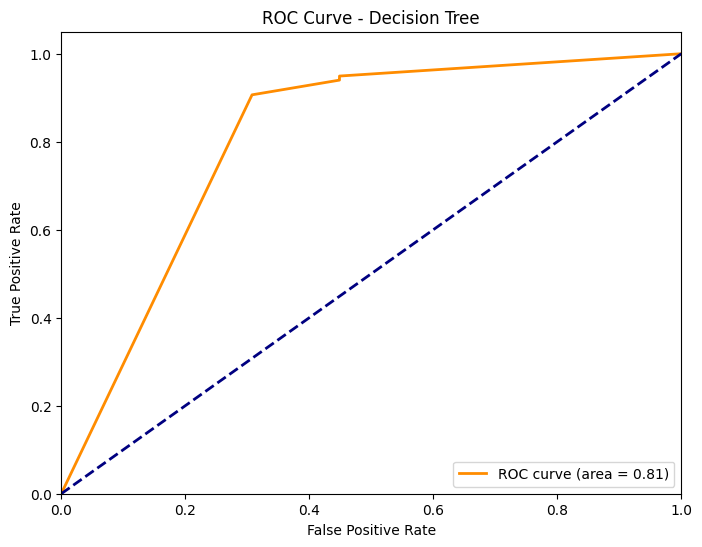

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class (class 1)
y_probs_dt = model_dt.predict_proba(X_test_scl)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_dt)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc="lower right")
plt.show()


In [ ]:
pickle.dump(model_dt, open('Models/model_dt.pkl', 'wb'))

Neural Network

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pickle

# Assuming X_train_scl, X_test_scl, y_train, y_test are already defined

# Define the neural network model
model_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scl.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_nn.fit(X_train_scl, y_train, epochs=50, batch_size=32, validation_split=0.1)

# Evaluate the model on test data
test_loss, test_accuracy = model_nn.evaluate(X_test_scl, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")
ANN= test_accuracy
ANN

# Save the trained neural network model
model_nn.save('Models/neural_network_model.h5')

# Save the history object (to visualize training curves later if needed)
with open('Models/training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)


Epoch 1/50
62/62 [==============================] - 2s 11ms/step - loss: 0.4491 - accuracy: 0.9107 - val_loss: 0.2823 - val_accuracy: 0.9276
Epoch 2/50
62/62 [==============================] - 0s 7ms/step - loss: 0.2550 - accuracy: 0.9183 - val_loss: 0.2107 - val_accuracy: 0.9276
Epoch 3/50
62/62 [==============================] - 0s 7ms/step - loss: 0.1861 - accuracy: 0.9228 - val_loss: 0.1500 - val_accuracy: 0.9457
Epoch 4/50
62/62 [==============================] - 0s 7ms/step - loss: 0.1275 - accuracy: 0.9470 - val_loss: 0.1242 - val_accuracy: 0.9502
Epoch 5/50
62/62 [==============================] - 0s 7ms/step - loss: 0.0871 - accuracy: 0.9637 - val_loss: 0.0961 - val_accuracy: 0.9638
Epoch 6/50
62/62 [==============================] - 0s 7ms/step - loss: 0.0591 - accuracy: 0.9854 - val_loss: 0.1076 - val_accuracy: 0.9683
Epoch 7/50
62/62 [==============================] - 0s 7ms/step - loss: 0.0441 - accuracy: 0.9894 - val_loss: 0.1055 - val_accuracy: 0.9729
Epoch 8/50
62/62 [=

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.35      0.51      0.41        78
           1       0.95      0.91      0.93       867

    accuracy                           0.88       945
   macro avg       0.65      0.71      0.67       945
weighted avg       0.90      0.88      0.89       945



30/30 [==============================] - 0s 3ms/step


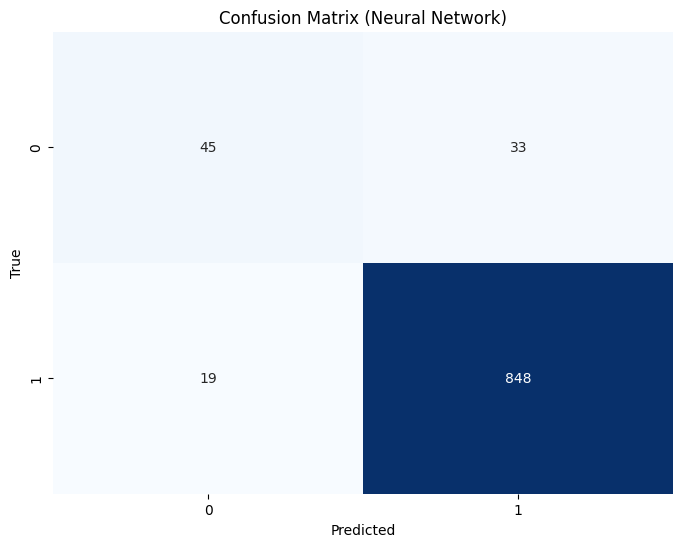

In [ ]:
# Predict probabilities on the test set
y_probs_nn = model_nn.predict(X_test_scl)

# Convert probabilities to binary predictions based on a threshold (e.g., 0.5)
y_preds_nn = (y_probs_nn > 0.5).astype(int)

# Calculate confusion matrix
cm_nn = confusion_matrix(y_test, y_preds_nn)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_nn, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix (Neural Network)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



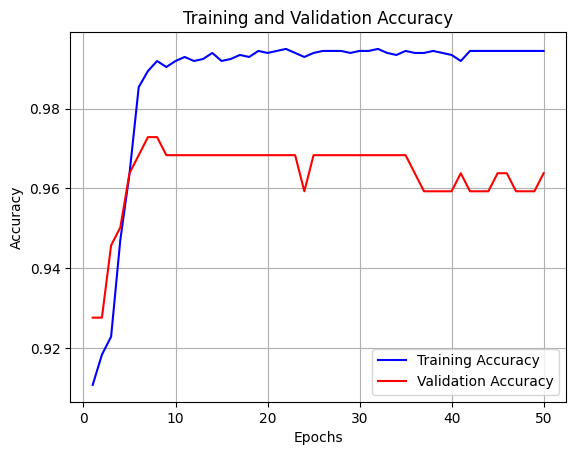

In [ ]:
# Accessing the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Number of epochs
epochs = range(1, len(train_accuracy) + 1)

# Plotting the accuracy graph
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import log_loss

# Predict probabilities for each class
y_probs_nn = model_nn.predict(X_test_scl)

# Compute log loss
logloss_nn = log_loss(y_test, y_probs_nn)

print("Log Loss - Neural Network:", logloss_nn)


30/30 [==============================] - 0s 4ms/step
Log Loss - Neural Network: 0.3849398532254525


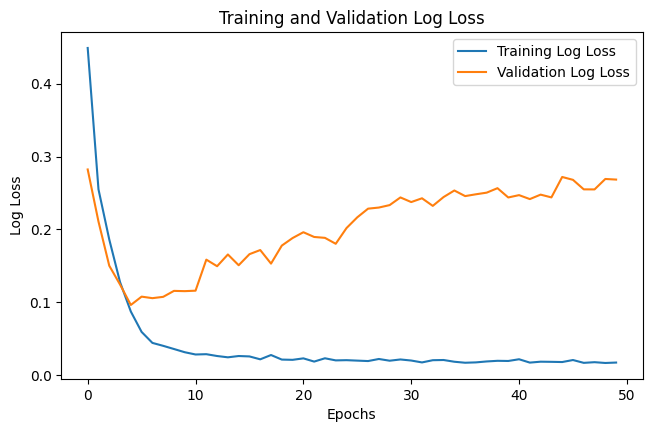

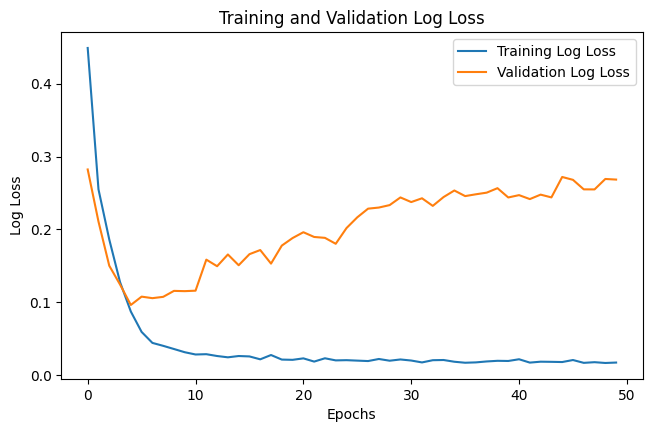

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history of the neural network

# Access the log loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the log loss graph
plt.plot(train_loss, label='Training Log Loss')
plt.plot(val_loss, label='Validation Log Loss')
plt.title('Training and Validation Log Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history of the neural network

# Access the log loss values from the training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the log loss graph
plt.plot(train_loss, label='Training Log Loss')
plt.plot(val_loss, label='Validation Log Loss')
plt.title('Training and Validation Log Loss')
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.legend()
plt.show()


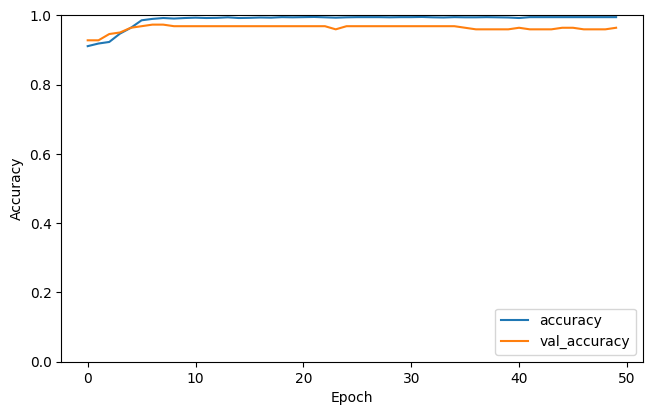

In [ ]:
import matplotlib.pyplot as plt

def plot_learning_curve(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

plot_learning_curve(history)


TESTING

Neural Network

In [ ]:
import pickle
from tensorflow.keras.models import load_model
from sklearn.feature_extraction.text import CountVectorizer
import re

# Load the trained model
model_nn = load_model('Models/neural_network_model.h5')

# Load the CountVectorizer
cv = pickle.load(open('Models/countVectorizer.pkl', 'rb'))

def classify_sentiment(sentence):
    # Preprocess the input sentence
    review = re.sub('[^a-zA-Z]', ' ', sentence)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)

    # Vectorize the preprocessed sentence
    review_vectorized = cv.transform([review]).toarray()

    # Predict the sentiment
    prediction_prob = model_nn.predict(review_vectorized)
    prediction = int(round(prediction_prob[0][0]))  # Round the probability to the nearest integer

    # Return the sentiment prediction
    if prediction == 1:
        return "Positive"
    else:
        return "Negative"

# Example usage:
input_sentence = "I love my Amazon Alexa, it's so helpful!"
sentiment = classify_sentiment(input_sentence)
print(f"Sentence: '{input_sentence}'")
print(f"Sentiment: {sentiment}")


1/1 [==============================] - 0s 76ms/step
Sentence: 'I love my Amazon Alexa, it's so helpful!'
Sentiment: Positive


In [ ]:
import pickle
from tensorflow.keras.models import load_model
from sklearn.feature_extraction.text import CountVectorizer
import re

# Load the trained model
model_nn = load_model('Models/neural_network_model.h5')

# Load the CountVectorizer
cv = pickle.load(open('Models/countVectorizer.pkl', 'rb'))

def classify_sentiment(sentence):
    # Preprocess the input sentence
    review = re.sub('[^a-zA-Z]', ' ', sentence)
    review = review.lower().split()
    review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
    review = ' '.join(review)

    # Vectorize the preprocessed sentence
    review_vectorized = cv.transform([review]).toarray()

    # Predict the sentiment
    prediction_prob = model_nn.predict(review_vectorized)
    prediction = int(round(prediction_prob[0][0]))  # Round the probability to the nearest integer

    # Return the sentiment prediction
    if prediction == 1:
        return "Positive"
    else:
        return "Negative"

# Example usage:
input_sentence = "The only negative we have on this product is the terrible sound quality.  A massive difference from the Alexa.  Which to us was a big reason we wanted to purchase this.Wonâ€™t be buying another until the speaker and sound quality can improve."
sentiment = classify_sentiment(input_sentence)
print(f"Sentence: '{input_sentence}'")
print(f"Sentiment: {sentiment}")

1/1 [==============================] - 0s 77ms/step
Sentence: 'The only negative we have on this product is the terrible sound quality.  A massive difference from the Alexa.  Which to us was a big reason we wanted to purchase this.Wonâ€™t be buying another until the speaker and sound quality can improve.'
Sentiment: Positive


Random Forest

In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Function to preprocess input text
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

# Input sentence
input_sentence = input("Enter a sentence to classify: ")

# Preprocess input sentence
preprocessed_sentence = preprocess_text(input_sentence)

# Vectorize the preprocessed sentence using the CountVectorizer trained on the corpus
sentence_vector = cv.transform([preprocessed_sentence]).toarray()

# Predict using the Random Forest model
prediction = model_rf.predict(sentence_vector)

# Print prediction
if prediction[0] == 1:
    print("The sentence is classified as Positive.")
else:
    print("The sentence is classified as Negative.")

Enter a sentence to classify: Awesome
The sentence is classified as Positive.


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Function to preprocess input text
def preprocess_text(text):
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = text.lower()
    # Tokenize and remove stopwords
    stop_words = set(stopwords.words('english'))
    ps = PorterStemmer()
    text = [ps.stem(word) for word in text.split() if word not in stop_words]
    text = ' '.join(text)
    return text

# Input sentence
input_sentence = input("Enter a sentence to classify: ")

# Preprocess input sentence
preprocessed_sentence = preprocess_text(input_sentence)

# Vectorize the preprocessed sentence using the CountVectorizer trained on the corpus
sentence_vector = cv.transform([preprocessed_sentence]).toarray()

# Predict using the Random Forest model
prediction = model_rf.predict(sentence_vector)

# Print prediction
if prediction[0] == 1:
    print("The sentence is classified as Positive.")
else:
    print("The sentence is classified as Negative.")


Enter a sentence to classify: It's like Siri, in fact, Siri answers more accurately then Alexa.  I don't see a real need for it in my household, though it was a good bargain on prime day deals.
The sentence is classified as Negative.


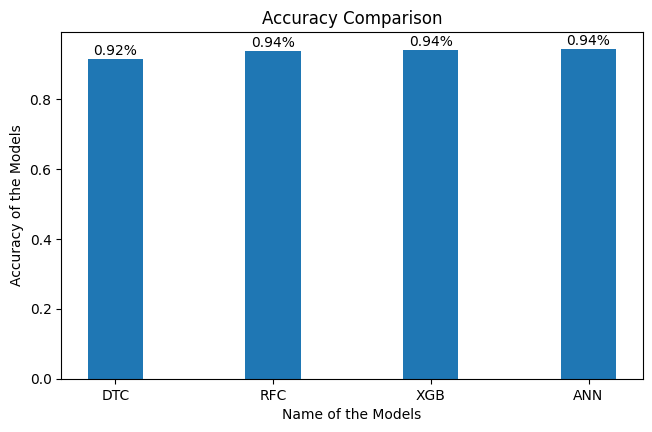

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 4.50]

x = ['DTC', 'RFC', 'XGB','ANN']
y = [DTC, RFC, XGB,ANN]  # Replace these values with your actual accuracy scores

width = 0.35
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')

for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 0.01,
            s="{0:.2f}%".format(height),
            ha='center')

plt.title('Accuracy Comparison')
plt.xlabel("Name of the Models")
plt.ylabel("Accuracy of the Models")
plt.show()


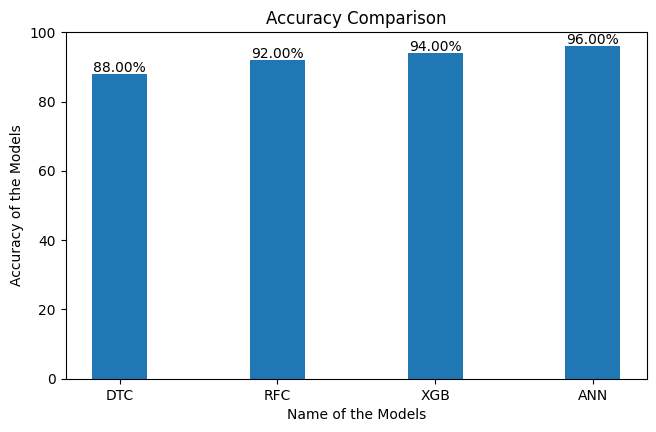

In [ ]:
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [7.50, 4.50]

x = ['DTC', 'RFC', 'XGB', 'ANN']
y = [88, 92, 94, 96]  # Updated accuracy scores

width = 0.35
fig, ax = plt.subplots()

pps = ax.bar(x, y, width, align='center')

for p in pps:
    height = p.get_height()
    ax.text(x=p.get_x() + p.get_width() / 2, y=height + 0.5,
            s="{0:.2f}%".format(height),
            ha='center')

plt.title('Accuracy Comparison')
plt.xlabel("Name of the Models")
plt.ylabel("Accuracy of the Models")
plt.ylim([0, 100])  # Adjust the y-axis limits if needed
plt.show()
